LIBRARIES AND CONNECTION

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

conn = pyodbc.connect('Driver={SQL Server};'
                     'Server=JUANCARLOSRUIZA;'
                     'Database=CzechBankingAnalysis;'
                     'Trusted_Connection=yes;')


DATE FORMAT VERIFICATION

In [11]:
# Check date format in Account table
date_format_query = """
SELECT TOP 10 
    acc_date,
    CONVERT(VARCHAR, acc_date, 120) AS iso_format, -- ISO format: YYYY-MM-DD HH:MI:SS
    CONVERT(VARCHAR, acc_date, 103) AS british_format, -- British/French format: DD/MM/YYYY
    CONVERT(VARCHAR, acc_date, 101) AS us_format -- US format: MM/DD/YYYY
FROM Account
ORDER BY acc_date
"""

# Display sample of dates with different format conversions
date_samples = pd.read_sql(date_format_query, conn)
display(date_samples)

# Get data type information
data_type_query = """
SELECT 
    COLUMN_NAME,
    DATA_TYPE,
    CHARACTER_MAXIMUM_LENGTH
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'Account' AND COLUMN_NAME = 'acc_date'
"""

# Display data type information
data_type_info = pd.read_sql(data_type_query, conn)
display(data_type_info)

C:\Users\carlo\AppData\Local\Temp\ipykernel_2924\3523664159.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  date_samples = pd.read_sql(date_format_query, conn)


,acc_date,iso_format,british_format,us_format
0,1993-01-01,1993-01-01,01/01/1993,01/01/1993
1,1993-01-01,1993-01-01,01/01/1993,01/01/1993
2,1993-01-01,1993-01-01,01/01/1993,01/01/1993
3,1993-01-01,1993-01-01,01/01/1993,01/01/1993
4,1993-01-02,1993-01-02,02/01/1993,01/02/1993
5,1993-01-02,1993-01-02,02/01/1993,01/02/1993
6,1993-01-03,1993-01-03,03/01/1993,01/03/1993
7,1993-01-03,1993-01-03,03/01/1993,01/03/1993
8,1993-01-03,1993-01-03,03/01/1993,01/03/1993
9,1993-01-03,1993-01-03,03/01/1993,01/03/1993


C:\Users\carlo\AppData\Local\Temp\ipykernel_2924\3523664159.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_type_info = pd.read_sql(data_type_query, conn)


,COLUMN_NAME,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH
0,acc_date,date,None


BASIC ACCOUNT STATISTICS

In [12]:
# Get basic account statistics
account_query = """
SELECT COUNT(*) as account_count,
       MIN(acc_date) as earliest_date,
       MAX(acc_date) as latest_date,
       COUNT(DISTINCT district_id) as district_count
FROM Account
"""
account_stats = pd.read_sql(account_query, conn)
display(account_stats)

# Get transaction volume over time
transaction_query = """
SELECT DATEPART(YEAR, Trans_date) as year,
       DATEPART(MONTH, Trans_date) as month,
       COUNT(*) as transaction_count,
       SUM(amount) as total_amount,
       AVG(amount) as avg_amount
FROM Trans
GROUP BY DATEPART(YEAR, Trans_date), DATEPART(MONTH, Trans_date)
ORDER BY year, month
"""
transaction_volume = pd.read_sql(transaction_query, conn)


C:\Users\carlo\AppData\Local\Temp\ipykernel_2924\3108404053.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  account_stats = pd.read_sql(account_query, conn)


,account_count,earliest_date,latest_date,district_count
0,4500,1993-01-01,1997-12-29,77


C:\Users\carlo\AppData\Local\Temp\ipykernel_2924\3108404053.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transaction_volume = pd.read_sql(transaction_query, conn)


VISUALIZATION

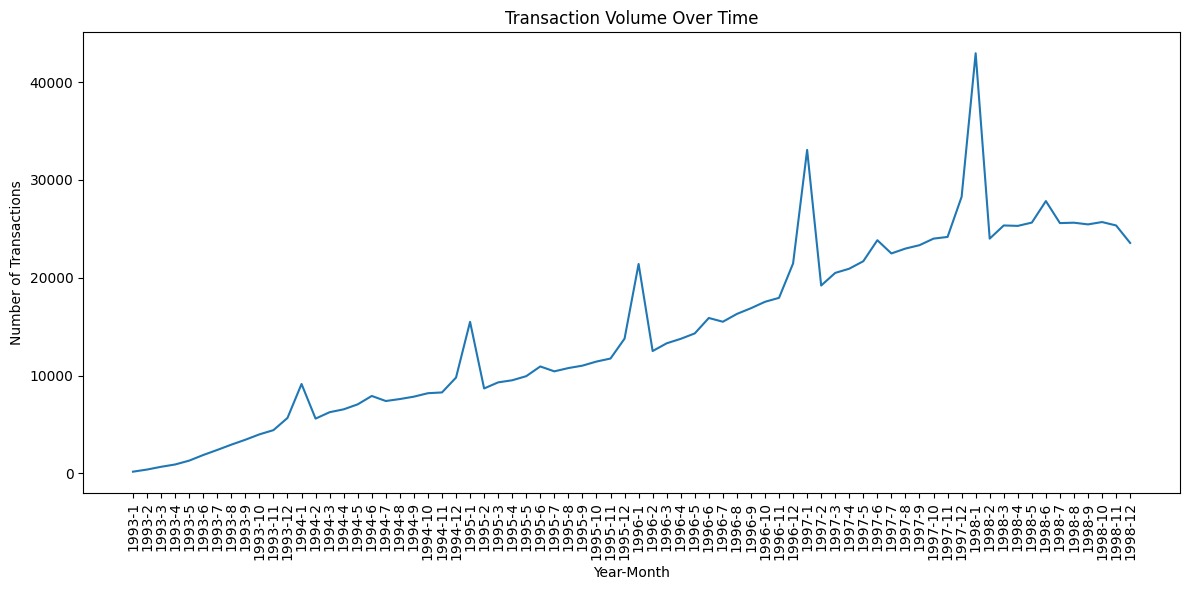

In [13]:
# Visualize transaction volume
plt.figure(figsize=(12, 6))
plt.plot(range(len(transaction_volume)), transaction_volume['transaction_count'])
plt.xticks(range(len(transaction_volume)), 
          [f"{y}-{m}" for y, m in zip(transaction_volume['year'], transaction_volume['month'])], 
          rotation=90)
plt.title('Transaction Volume Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


# Conclusions from Initial Data Exploration

1. **Account Data Overview**: The banking dataset contains 4,500 accounts spanning from January 1993 to December 1997 (approximately 5 years), distributed across 77 different districts. This provides a substantial time period for analyzing customer behavior patterns.

2. **Date Format Consistency**: The account dates are stored in a standardized date format, which will facilitate time-based analysis. This is important for accurate calculations of customer recency metrics in our RFM analysis.

3. **Transaction Pattern Visualization**: The transaction volume over time shows considerable fluctuation, with some noticeable peaks and valleys. This suggests seasonal or periodic transaction behavior that should be incorporated into our customer segmentation and lifetime value models.